## Import delle librerie

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lm

## Import del dataset

In [160]:
from google.colab import files 
file = files.upload() #il metodo upload() permette di caricare un file in Colab 

KeyboardInterrupt: ignored

# **Lettura file**

In [161]:
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
status = pd.read_csv("status.csv")

In [162]:
results_copy = results.copy()

results_copy.drop(columns=['position','positionText','number','time','milliseconds','rank','fastestLap','fastestLapTime','fastestLapSpeed'])


,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
0,1,18,1,1,1,1,10.0,58,1
1,2,18,2,2,5,2,8.0,58,1
2,3,18,3,3,7,3,6.0,58,1
3,4,18,4,4,11,4,5.0,58,1
4,5,18,5,1,3,5,4.0,58,1
...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,4,15,0.0,55,5
25395,25401,1073,849,3,16,16,0.0,50,3
25396,25402,1073,841,51,14,17,0.0,33,6
25397,25403,1073,847,3,17,18,0.0,26,6


# **Tabella results**

446
614


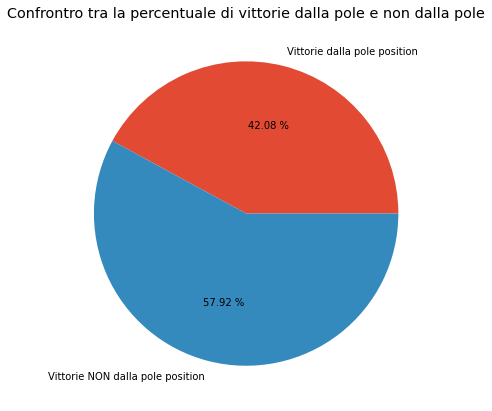

<Figure size 432x288 with 0 Axes>

In [163]:
#otteniamo il numero di piloti che hanno vinto partendo dalla prima posizione
winner_from_pole = results.loc[(results['grid'] == 1) & (results['positionOrder'] == 1)].count()[0]
print(winner_from_pole)

#otteniamo il numero di piloti che hanno vinto partendo da una posizione diversa dalla prima
winner_not_from_pole = results.loc[(results['grid'] != 1) & (results['positionOrder'] == 1)].count()[0]
print(winner_not_from_pole)

#creaimo un pie chart con questi valori
labels = ['Vittorie dalla pole position','Vittorie NON dalla pole position'] #label da utilizzare 

plt.figure(figsize=(7,7)) #dimensioni del grafico
plt.style.use('ggplot') #stile del grafico
plt.pie([winner_from_pole,winner_not_from_pole],labels=labels,autopct= '%.2f %%') #creazione del grafico
plt.title('Confrontro tra la percentuale di vittorie dalla pole e non dalla pole') #titolo del grafico
plt.show() #mostriamo il grafico
plt.savefig('Starting_position',dpi = 300) #salviamo il grafico


In [164]:
races.loc[races.year == 2021].sort_values('round')

,raceId,year,round,circuitId,name,date,time,url
1037,1052,2021,1,3,Bahrain Grand Prix,2021-03-28,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...
1035,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,13:00:00,http://en.wikipedia.org/wiki/2021_Emilia_Romag...
1039,1054,2021,3,75,Portuguese Grand Prix,2021-05-02,14:00:00,http://en.wikipedia.org/wiki/2021_Portuguese_G...
1040,1055,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
1041,1056,2021,5,6,Monaco Grand Prix,2021-05-23,13:00:00,http://en.wikipedia.org/wiki/2021_Monaco_Grand...
1042,1057,2021,6,73,Azerbaijan Grand Prix,2021-06-06,12:00:00,http://en.wikipedia.org/wiki/2021_Azerbaijan_G...
1044,1059,2021,7,34,French Grand Prix,2021-06-20,13:00:00,http://en.wikipedia.org/wiki/2021_French_Grand...
1043,1058,2021,8,70,Styrian Grand Prix,2021-06-27,13:00:00,http://en.wikipedia.org/wiki/2021_Styrian_Gran...
1045,1060,2021,9,70,Austrian Grand Prix,2021-07-04,13:00:00,http://en.wikipedia.org/wiki/2021_Austrian_Gra...
1046,1061,2021,10,9,British Grand Prix,2021-07-18,14:00:00,http://en.wikipedia.org/wiki/2021_British_Gran...


In [165]:
drivers.loc[drivers['surname'] == 'Sutil']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
15,16,sutil,99,SUT,Adrian,Sutil,1983-01-11,German,http://en.wikipedia.org/wiki/Adrian_Sutil


# **Tabella driver standings**

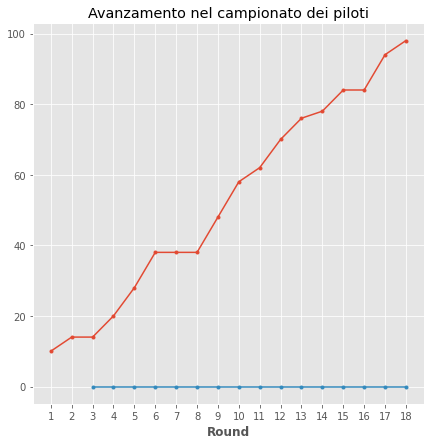

In [170]:
df = driver_standings.merge(races, how='inner') #unione di driver_standings e races
df_copy = df.copy() #copia di sicurezza

new = df_copy.drop(columns=['positionText','time','url','date'])

#otteniamo la classifica del 2008 del pilota con id = 1
driver1 = new.loc[(new['driverId'] == 1) & (new['year'] == 2008)]
#otteniamo la classifica del 2008 del pilota con id = 16
driver16 = new.loc[(new['driverId'] == 16) & (new['year'] == 2008)]

#mostriamo un grafico dell'avanzamento nel campionato
#settiamo le dimensioni del grafico
plt.figure(figsize=(7,7))

#inseriamo nel grafico il pilota con id = 1
plt.plot(driver1['round'],driver1.points, label = 'Points',marker = '.')
#inseriamo nel grafico il pilota con id = 16
plt.plot(driver16['round'],driver16.points, label = 'Points',marker = '.')
#settiamo la dimensione dei valori dell'asse x
plt.xticks(driver1['round'][::1])
#diamo un nome all'asse delle x
plt.xlabel('Round', fontdict={'fontweight':'bold','fontsize':12})

#diamo un titolo al grafico
plt.title('Avanzamento nel campionato dei piloti')
#mostriamo il grafico
plt.show()